# Import libraries, Load dataset and display the dataset rows

In [7]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

import csv
import nltk
from nltk.tokenize import word_tokenize

from nltk.corpus import stopwords

#lemmitazation
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from bs4 import BeautifulSoup
import re

In [8]:
#Load dataset file
df=pd.read_csv('dataset/drugsComTrain_raw.csv')

In [9]:
df.head(10) #display first 10 rows of dataframe

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [10]:
df.condition.value_counts() #Frequency count in condition column

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

## EXPLORATORY DATA ANALYSIS

In [11]:
# Dataset summery using statistical computations
df.describe(include ='all')

,uniqueID,drugName,condition,review,rating,date,usefulCount
count,161297.000000,161297,160398,161297,161297.000000,161297,161297.000000
unique,NaN,3436,884,112329,NaN,3579,NaN
top,NaN,Levonorgestrel,Birth Control,"""Good""",NaN,1-Mar-16,NaN
freq,NaN,3657,28788,33,NaN,146,NaN
mean,115923.585305,NaN,NaN,NaN,6.994377,NaN,28.004755
std,67004.445170,NaN,NaN,NaN,3.272329,NaN,36.403742
min,2.000000,NaN,NaN,NaN,1.000000,NaN,0.000000
25%,58063.000000,NaN,NaN,NaN,5.000000,NaN,6.000000
50%,115744.000000,NaN,NaN,NaN,8.000000,NaN,16.000000
75%,173776.000000,NaN,NaN,NaN,10.000000,NaN,36.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [13]:
# Check for missing values
missing_values = df.isnull().sum()
# Print the count of missing values for each column
print(missing_values)

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64


In [14]:
# convert "date" column to datetime data type
df['date'] = pd.to_datetime(df['date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   uniqueID     161297 non-null  int64         
 1   drugName     161297 non-null  object        
 2   condition    160398 non-null  object        
 3   review       161297 non-null  object        
 4   rating       161297 non-null  int64         
 5   date         161297 non-null  datetime64[ns]
 6   usefulCount  161297 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 8.6+ MB


In [16]:
# fill in the missing values of condition with the string “no condition”
df["condition"].fillna("no condition", inplace = True)
   
df.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
# Print the count of missing values for each column
print(missing_values)

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


In [18]:
# Filter data for specific conditions
df_train = df[(df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

## DATA VISUALIZATION

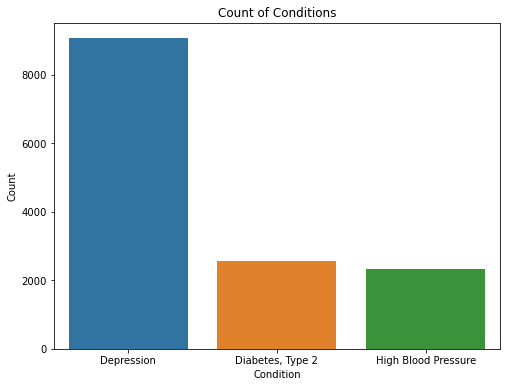

In [19]:
# Bar Chart - Count of Conditions
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='condition')
plt.title('Count of Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

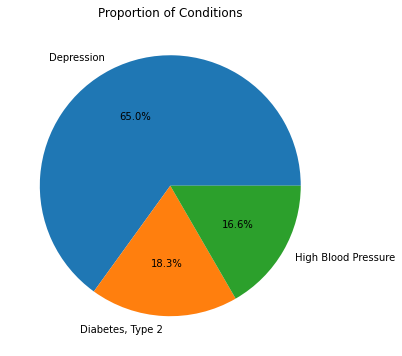

In [20]:
# Pie Chart - Proportion of Conditions
plt.figure(figsize=(8, 6))
df_train['condition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Conditions')
plt.ylabel('')
plt.show()

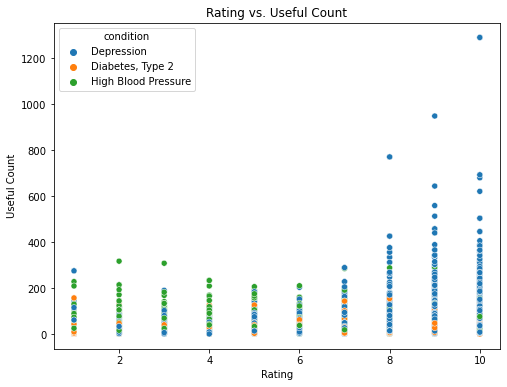

In [21]:
# Scatter Plot - Rating vs. Useful Count
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_train, x='rating', y='usefulCount', hue='condition')
plt.title('Rating vs. Useful Count')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.show()

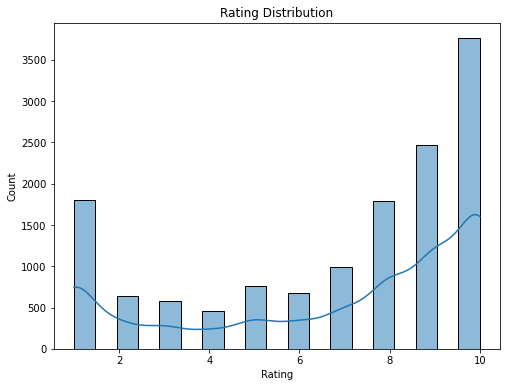

In [22]:
# Histogram - Rating Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='rating', kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

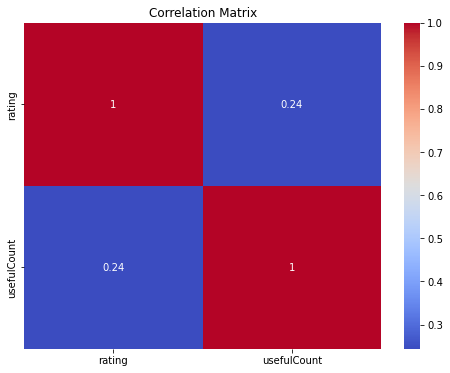

In [23]:
# Heatmap - Correlation Matrix
plt.figure(figsize=(8, 6))
corr_matrix = df_train[['rating', 'usefulCount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## HANDLING OUTLIERS

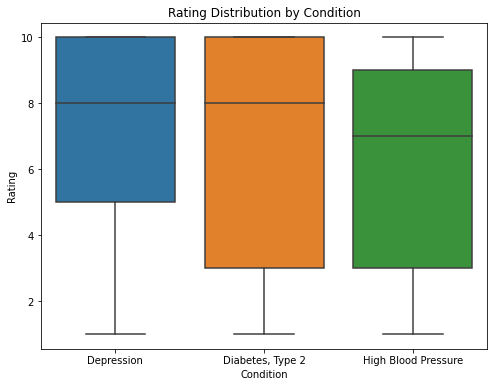

In [24]:
# Box Plot - Rating Distribution by Condition
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train, x='condition', y='rating')
plt.title('Rating Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Rating')
plt.show()

<AxesSubplot:xlabel='usefulCount'>

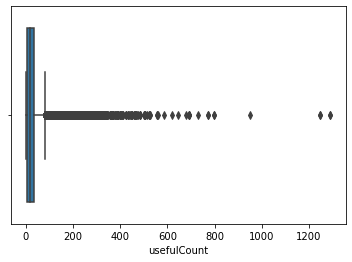

In [25]:
#boxplot for usefulCount: values above 800 are outliers
sns.boxplot(x='usefulCount', data=df)

In [26]:
# drop unecessary columns 
X = df_train.drop(['uniqueID','drugName','rating','date','usefulCount'],axis=1)

In [27]:
X.condition.value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [28]:
X.head()

,condition,review
11,Depression,"""I have taken anti-depressants for years, with..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
44,Depression,"""my gp started me on Venlafaxine yesterday to ..."
50,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l..."
67,Depression,"""This medicine saved my life. I was at my wits..."


In [29]:
# segregating dataframe for analyzing individual condition
X_depress=X[(X['condition']=='Depression')]
X_hbp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

Text(0.5, 1.0, 'Word cloud for Depression')

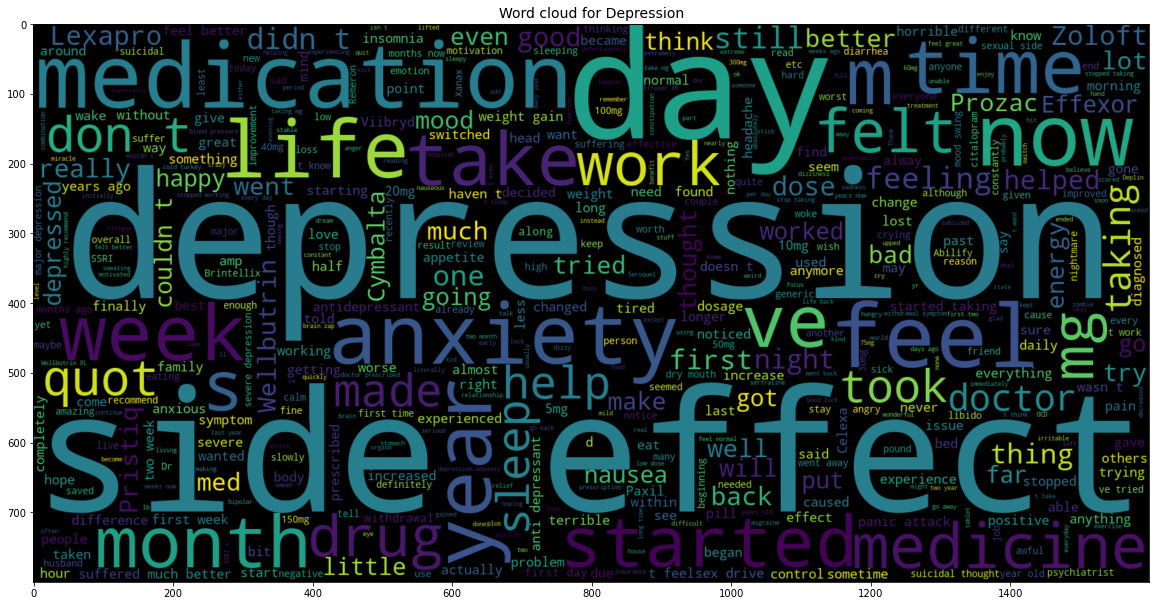

In [30]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_depress.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure ')

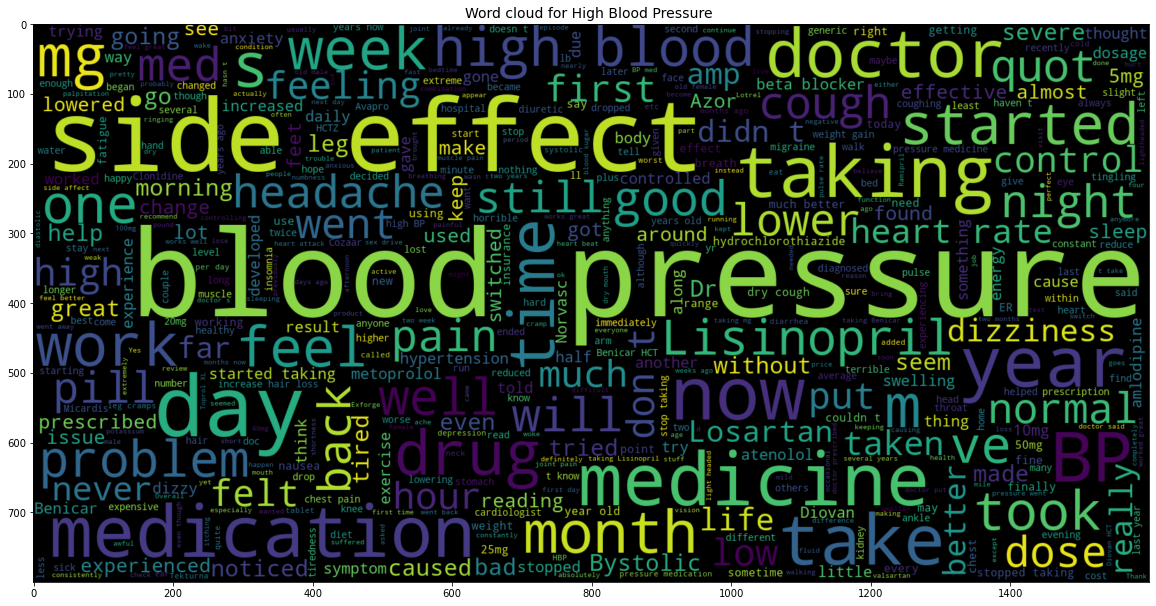

In [31]:

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_hbp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure ',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Diabetes, Type 2')

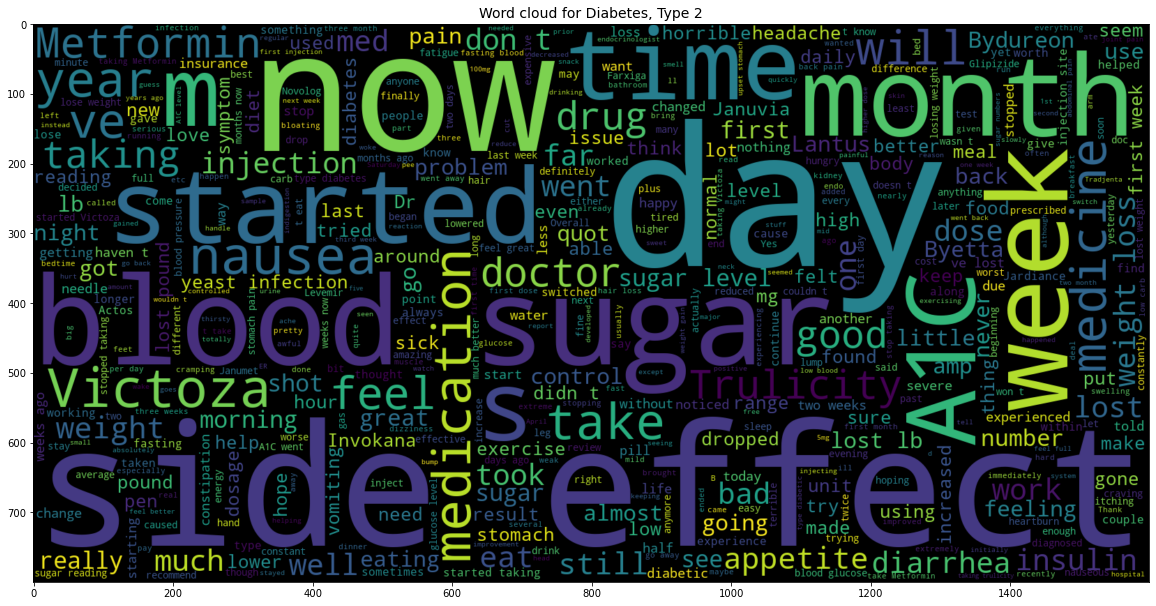

In [32]:

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes, Type 2',fontsize=14)

## Data preprocessing

In [33]:
# Remove double quotes in review colomn
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [34]:
# To set the width of the column to maximum
pd.set_option('max_colwidth',None)

In [35]:
X.head()

,condition,review
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.
44,Depression,"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"
50,"Diabetes, Type 2","Hey Guys, It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work. So, I have been on Trulicity for six months now with Metformin. When I hit the five month period the diarrhea, gas, sulphur belching finally subsided. I now longer have any of those side effects. However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol. I have been back on the Metformin with Trulicity for about a week now, so we will see what this does. I was diagnosed as stage 3 chronic kidney disease (CKD 3) so I am watching diet closely."
67,Depression,"This medicine saved my life. I was at my wits end with anti-depressants and was ready to give up. My doctor finally prescribed me this after many failed medications, I am so glad she did. I honestly do not know where I would be without Effexor XR. Side effects were very mild compared to other anti-depressants I tried. I was drowsy for the first couple days, but it was tolerable. I highly recommend this for severe depression. I would also like to mention for people to realize there is light at the end of the tunnel and YOU WILL GET BETTER, and to never give up."


## FEATURE TUNING

In [36]:
# Stopwords
stopwords_list = stopwords.words('english')

In [37]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
#Lemmatization
porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

def review_to_words(raw_review):
      """
      Converts a raw review to a list of words.

      Args: allows a function to take variable length arguments
        raw_review: The raw review text.

      Returns:
        A list of words.
      """

  # Remove HTML.
      review_text = BeautifulSoup(raw_review, 'html.parser').get_text()

  # Convert to lowercase and split into words.
      words = review_text.lower().split()

  # Remove stop words.
      stopwords_list = set(stopwords.words('english'))
      meaningful_words = [word for word in words if word not in stopwords_list]

  # Lemmatize words.
      lemmatizer = WordNetLemmatizer()
      lemmatized_words = [lemmatizer.lemmatize(word) for word in meaningful_words]

  # Join words with spaces.
      return ' '.join(lemmatized_words)

In [39]:
X['review_clean'] = X['review'].apply(review_to_words)

C:\Users\GTL\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [40]:
X.head(10)

,condition,review,review_clean
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.","taken anti-depressants years, improvement mostly moderate severe side affects, make go them. take cymbalta mostly pain. began deplin, noticed major improvement overnight. energy, better disposition, sinking low low major depression. taking 3 month feel like normal person first time ever. best thing, side effects."
31,Depression,1 week on Zoloft for anxiety and mood swings. I take 50mg in the mornings with my breakfast. Nausea on day one but that subsided as the week went on. I get the jitters about 2 hrs after taking it followed by yawning. I feel much better though and less angry/stressed.,1 week zoloft anxiety mood swings. take 50mg morning breakfast. nausea day one subsided week went on. get jitter 2 hr taking followed yawning. feel much better though le angry/stressed.
44,Depression,"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better","gp started venlafaxine yesterday help depression change,a hour taking feeling sick couldn,t stomach food fluids, thought keep told come side effect would get better,took another one last night ill couldn,t stand ,being sick sweating shaking thought going pas out. get sleep hopeing feel better morning,took another one felt spaced dry mouth shaking ,sick, booked see gp make sure feeling like this, find put wrong dose 37.5mg put 150mg, right dose hope better"
50,"Diabetes, Type 2","Hey Guys, It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work. So, I have been on Trulicity for six months now with Metformin. When I hit the five month period the diarrhea, gas, sulphur belching finally subsided. I now longer have any of those side effects. However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol. I have been back on the Metformin with Trulicity for about a week now, so we will see what this does. I was diagnosed as stage 3 chronic kidney disease (CKD 3) so I am watching diet closely.","hey guys, 4 month since last post wanted give month see going work. so, trulicity six month metformin. hit five month period diarrhea, gas, sulphur belching finally subsided. longer side effects. however, still lost weight all, think first started trulicity taking glimepiride one side effect weight gain think two med fighting lol. back metformin trulicity week now, see does. diagnosed stage 3 chronic kidney disease (ckd 3) watching diet closely."
67,Depression,"This medicine saved my life. I was at my wits end with anti-depressants and was ready to give up. My doctor finally prescribed me this after many failed medications, I am so glad she did. I honestly do not know where I would be without Effexor XR. Side effects wer

# Creating features and Target Variable

In [41]:
X_feature=X['review_clean']
y=X['condition']

In [42]:
# Split data into traing and testing
X_train, X_test, y_train, y_test = train_test_split(X_feature, y,stratify=y,test_size=0.2, random_state=0)

In [43]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Plot the confusion matrix as an image
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Set the title of the plot
    plt.title(title)
    
    # Add a colorbar to the plot
    plt.colorbar()
    
    # Create an array of tick locations on the x-axis
    tick_marks = np.arange(len(classes))
    
    # Set the tick locations and labels on the x-axis
    plt.xticks(tick_marks, classes, rotation=45)
    
    # Set the tick locations and labels on the y-axis
    plt.yticks(tick_marks, classes)
    
    if normalize:
        # Normalize the confusion matrix if specified
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    # Determine the threshold for text color
    thresh = cm.max() / 2.
    
    # Iterate over the confusion matrix and add text annotations
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    # Set the layout of the plot
    plt.tight_layout()
    
    # Set the label for the y-axis
    plt.ylabel('True label')
    
    # Set the label for the x-axis
    plt.xlabel('Predicted label')

# FEATURE EXTRACTION: Bag of words Technique

In [44]:
# Bag of words
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [45]:

count_train

<11155x12859 sparse matrix of type '<class 'numpy.int64'>'
	with 349607 stored elements in Compressed Sparse Row format>

# Machine Learning Model comparison using bag of words: Naive Bayes and Passive Aggressive Classifier

In [46]:
# Naive Bayes

accuracy:   0.959
Confusion matrix, without normalization


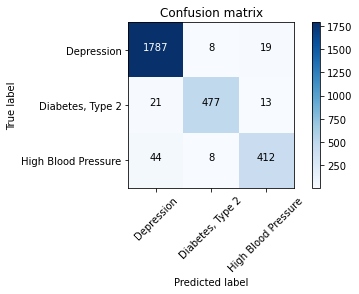

In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Create a MultinomialNB classifier.
mnb = MultinomialNB()

# Fit the classifier to the training data.
mnb.fit(count_train, y_train)

# Predict the labels for the test data.
pred = mnb.predict(count_test)

# Calculate the accuracy of the predictions.
score = accuracy_score(y_test, pred)

# Print the accuracy score.
print("accuracy:   %0.3f" % score)

# Create a confusion matrix.
cm = confusion_matrix(y_test, pred, labels=unique_labels(y_test))

# Plot the confusion matrix.
plot_confusion_matrix(cm, classes=unique_labels(y_test))

In [48]:
# Passive Aggressive Classifier

accuracy:   0.947
Confusion matrix, without normalization


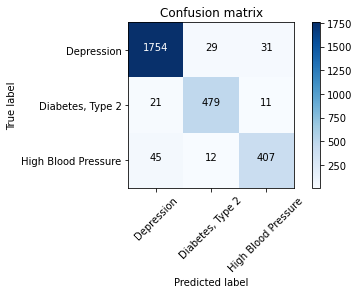

In [49]:

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

# FEATURE EXTRACTION: TF-IDF Technique

In [50]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

# Machine Learning Model comparison using TF-IDF: Naive Bayes and Passive Aggressive Classifier

In [51]:
# Naive Bayes

accuracy:   0.895
Confusion matrix, without normalization


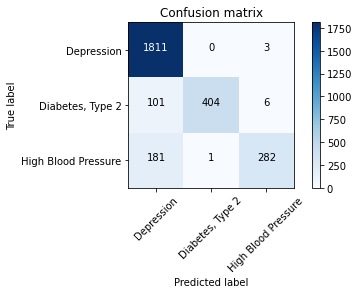

In [52]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

In [53]:
# Passive Aggressive Classifier: Trigrams

accuracy:   0.968
Confusion matrix, without normalization


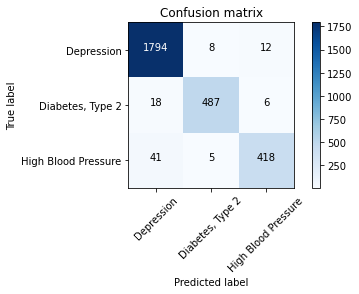

In [54]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a TfidfVectorizer object
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1, 3))

# Fit the TfidfVectorizer object to the training data
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)

# Transform the test data using the TfidfVectorizer object
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

# Create a PassiveAggressiveClassifier object
pass_tf = PassiveAggressiveClassifier()

# Fit the PassiveAggressiveClassifier object to the training data
pass_tf.fit(tfidf_train_3, y_train)

# Predict the labels for the test data
pred = pass_tf.predict(tfidf_test_3)

# Calculate the accuracy score
score = accuracy_score(y_test, pred)

# Print the accuracy score
print("accuracy:   %0.3f" % score)

# Create a confusion matrix
cm = confusion_matrix(y_test, pred, labels=['Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Depression','Diabetes, Type 2','High Blood Pressure'])

In [55]:
X.tail()

,condition,review,review_clean
161251,High Blood Pressure,It is fourth blood pressure pill for me. It feels like it is only partly working. My blood pressure problems are usually happening after anxiety attacks of which doctors says I have but don&#039;t know why.,fourth blood pressure pill me. feel like partly working. blood pressure problem usually happening anxiety attack doctor say know why.
161258,High Blood Pressure,"While on Bystolic my feet and arms were numb. My blood sugars became severely elevated from 112 glucose up to 249. This blood pressure pill is not a good choice for my diabetic condition. I was only on Bystolic for one week and now eight weeks later I am still suffering from foot and heel pain. However, going back on Vasotec my blood sugars have dropped back down to 112.","bystolic foot arm numb. blood sugar became severely elevated 112 glucose 249. blood pressure pill good choice diabetic condition. bystolic one week eight week later still suffering foot heel pain. however, going back vasotec blood sugar dropped back 112."
161278,"Diabetes, Type 2",I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me,got diagnosed type 2. doctor prescribed invokana metformin beginning. sugar went normal second week. losing much weight. side effect yet. miracle medicine
161286,Depression,"This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.","third med i've tried anxiety mild depression. week hate much. dizzy, major diarrhea feel worse started. contacting doc changing asap."
161290,High Blood Pressure,"I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.","tekturna 9 days. effect immediate. also calcium channel blocker (tiazac) hydrochlorothiazide. put tekturna palpitation experienced diovan (ugly drug opinion, company produce however). palpitation pretty bad diovan, 24 hour monitor ekg etc. day substituting tekturna diovan, palpitations."


In [56]:
# Function for Extracting Top drug

def top_drugs_extractor(condition):
      """
      Extracts the top 6 drugs for a given condition.

      Args:
        condition: The condition to extract the top drugs for.

      Returns:
        A list of the top 6 drugs.
      """

  # Filter the DataFrame to only include drugs with a rating of 9 or higher and a useful count of 100 or higher.
      df_top = df[(df['rating'] >= 9) & (df['usefulCount'] >= 100)]

  # Sort the DataFrame by rating and useful count, in descending order.
      df_top = df_top.sort_values(by=['rating', 'usefulCount'], ascending=[False, False])

  # Get the top 6 drugs for the given condition.
      drug_lst = df_top[df_top['condition'] == condition]['drugName'].head(6).tolist()

      return drug_lst

# User Interface using tkinder library. Passive aggressive classifier trigram model using TF-IDF 

In [57]:
import tkinter as tk
from IPython.display import display, clear_output

# Function for predicting condition and suggesting drugs
def predict_drugs():
    # Get the user's input sentence
    sentence = sentence_entry.get()

    # If the user enters a blank line, show an error message
    if not sentence:
        clear_output(wait=True)
        output_label.config(text="Please enter a sentence.")
        return

    # Perform prediction on the preprocessed sentence
    tfidf_trigram = tfidf_vectorizer3.transform([sentence])
    prediction = pass_tf.predict(tfidf_trigram)[0]

    # Determine the target and top drugs based on the predicted label
    if prediction == "High Blood Pressure":
        target = "High Blood Pressure"
    elif prediction == "Depression":
        target = "Depression"
    elif prediction == "Diabetes, Type 2":
        target = "Diabetes, Type 2"
    else:
        target = "Birth Control"

    top_drugs = top_drugs_extractor(target)

    # Display the predicted condition and top drugs
    clear_output(wait=True)
    output_label.config(text=f"Text: {sentence}\n\nCondition: {target}\n\nSuggested Drugs:\n{', '.join(top_drugs)}")

# Create the main Tkinter window
window = tk.Tk()
window.title("Sentence Prediction")

# Calculate the center position of the screen
screen_width = window.winfo_screenwidth()
screen_height = window.winfo_screenheight()
window_width = 400
window_height = 200
x = (screen_width // 2) - (window_width // 2)
y = (screen_height // 2) - (window_height // 2)

# Set the window size and position it in the center of the screen
window.geometry(f"{window_width}x{window_height}+{x}+{y}")

# Create a label for the sentence entry
sentence_label = tk.Label(window, text="Enter Sentence:")
sentence_label.pack()

# Create a text entry field for the sentence
sentence_entry = tk.Entry(window, width=50)
sentence_entry.pack()

# Create a button to trigger the prediction
predict_button = tk.Button(window, text="Predict", command=predict_drugs)
predict_button.pack()

# Create a label for the output
output_label = tk.Label(window, text="", wraplength=380)
output_label.pack()

# Run the Tkinter event loop
window.mainloop()